# SOFTWARE QUALIY EVALUATION PROJECT

## IMPORT

In [1]:
#libraries import
import pandas as pd
import numpy as np
import pylab as plt 
import seaborn as sns
import plotly.graph_objs as go
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.metrics as metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy
from scipy import stats
from scipy.spatial import *
from IPython.core.display import display, HTML
from sklearn.decomposition import PCA

In [2]:
#dataset import
df_jedit = pd.read_csv('https://raw.githubusercontent.com/Smilzo97/SQE_project_Molteni/main/jedit-4.3.csv', sep=';')
#renaming 'name.1' in 'feature_name'
df_jedit.rename(columns = {'name.1':'feature_name'}, inplace = True)

In [3]:
#show the first 5 lines
df_jedit.head(5)

,name,version,feature_name,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,jEdit,4.3,org.gjt.sp.jedit.bufferio.BufferAutosaveRequest,2,3,0,9,16,1,1,9,2,2,113,0.0000,0,0.933333,0.583333,0,0,55.5,9,4.500,0
1,jEdit,4.3,org.gjt.sp.jedit.bsh.CommandLineReader,4,3,0,1,8,4,1,0,4,1,82,0.0000,0,0.857143,0.350000,2,2,18.5,1,0.750,0
2,jEdit,4.3,org.gjt.sp.jedit.bufferset.BufferSet,18,1,0,16,55,0,11,8,13,0.647058824,687,1.0000,0,0.000000,0.426471,0,0,3.688.888.889,12,2.500,1
3,jEdit,4.3,org.gjt.sp.jedit.options.GeneralOptionPane,6,6,0,4,36,1,1,4,1,0.8875,464,0.6875,0,0.992582,0.500000,3,5,7.366.666.667,7,21.667,0
4,jEdit,4.3,org.gjt.sp.util.XMLUtilities,4,1,0,26,29,6,25,1,3,2,213,0.0000,0,0.000000,0.291667,0,0,52.25,15,4.750,0


## DATA DESCRIPTION

In [4]:
#columns name
columns = df_jedit.columns
columns

Index(['name', 'version', 'feature_name', 'wmc', 'dit', 'noc', 'cbo', 'rfc',
       'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam',
       'ic', 'cbm', 'amc', 'max_cc', 'avg_cc', 'bug'],
      dtype='object')

In [5]:
#dataset shape
df_jedit.shape

(492, 24)

In [6]:
#dataset informations
print(df_jedit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          492 non-null    object 
 1   version       492 non-null    float64
 2   feature_name  492 non-null    object 
 3   wmc           492 non-null    int64  
 4   dit           492 non-null    int64  
 5   noc           492 non-null    int64  
 6   cbo           492 non-null    int64  
 7   rfc           492 non-null    int64  
 8   lcom          492 non-null    int64  
 9   ca            492 non-null    int64  
 10  ce            492 non-null    int64  
 11  npm           492 non-null    int64  
 12  lcom3         492 non-null    object 
 13  loc           492 non-null    int64  
 14  dam           492 non-null    float64
 15  moa           492 non-null    int64  
 16  mfa           492 non-null    float64
 17  cam           492 non-null    float64
 18  ic            492 non-null    

In [7]:
 #check null values
df_jedit.isnull().sum()

name            0
version         0
feature_name    0
wmc             0
dit             0
noc             0
cbo             0
rfc             0
lcom            0
ca              0
ce              0
npm             0
lcom3           0
loc             0
dam             0
moa             0
mfa             0
cam             0
ic              0
cbm             0
amc             0
max_cc          0
avg_cc          0
bug             0
dtype: int64

In [8]:
#element count
df_jedit["bug"].value_counts()

0    481
1     10
2      1
Name: bug, dtype: int64

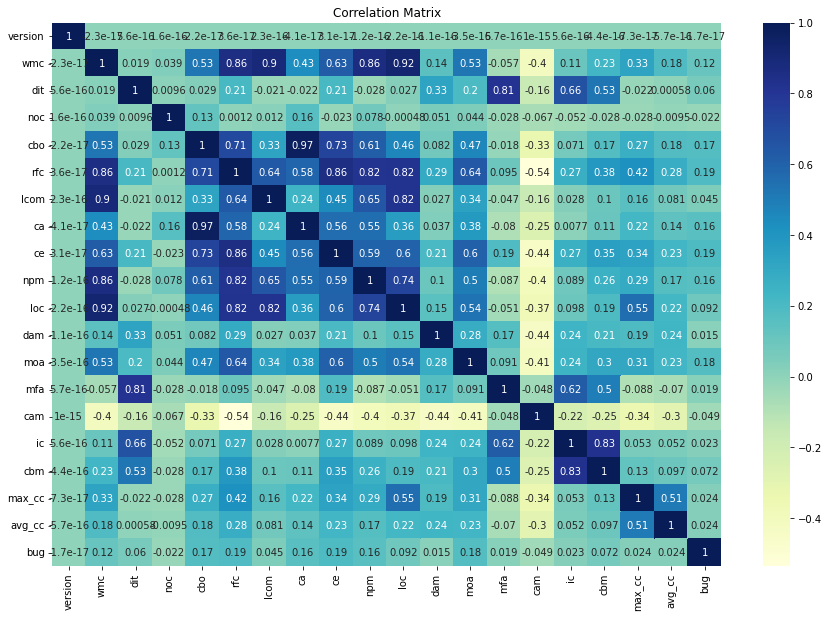

In [9]:
#correlation matrix creation
correlation_matrix = df_jedit[df_jedit.columns].corr()
#set the figure size
figure, ax = plt.subplots(figsize = (15,10))
#set the title
ax.set_title("Correlation Matrix")
#addition of the matrix 
ax = sns.heatmap(correlation_matrix, cmap = "YlGnBu", annot = True)

## FEATURE SELECTION

In [10]:
# dataset copy
df_dummy = df_jedit.copy()
#grouping the values by variable "bug"
df_dummy.groupby('bug')
#delete useless columns
df_dummy = df_dummy.drop(["version", "name","max_cc","avg_cc"], axis=1)
#Convert categorical variable into dummy/indicator variables.
df_dummy = pd.get_dummies(df_dummy)
#print the first 18 attributes
df_dummy.iloc[:, :17]

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,loc,dam,moa,mfa,cam,ic,cbm,bug
0,2,3,0,9,16,1,1,9,2,113,0.0000,0,0.933333,0.583333,0,0,0
1,4,3,0,1,8,4,1,0,4,82,0.0000,0,0.857143,0.350000,2,2,0
2,18,1,0,16,55,0,11,8,13,687,1.0000,0,0.000000,0.426471,0,0,1
3,6,6,0,4,36,1,1,4,1,464,0.6875,0,0.992582,0.500000,3,5,0
4,4,1,0,26,29,6,25,1,3,213,0.0000,0,0.000000,0.291667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,11,2,1,12,54,25,1,11,5,444,1.0000,1,0.666667,0.227273,2,10,0
488,3,2,0,5,9,0,3,2,3,36,1.0000,0,0.600000,0.666667,1,1,0
489,3,3,1,7,5,3,4,3,2,19,0.0000,0,1.000000,0.583333,0,0,0
490,2,2,0,1,4,1,0,1,2,16,0.0000,0,0.750000,0.750000,1,1,0


In [11]:
#bug column extraction
bug = df_jedit.loc[:,"bug"]

chi2 scores
   feature       score          pval
9      loc  339.507727  8.167310e-76
5     lcom  109.991521  9.841076e-26
4      rfc   14.302820  1.556315e-04
3      cbo   10.618041  1.119896e-03
6       ca    8.757637  3.083082e-03
8      npm    4.824414  2.805940e-02
7       ce    3.668591  5.544703e-02
15     cbm    1.501018  2.205147e-01
11     moa    1.081466  2.983697e-01
1      dit    0.791813  3.735524e-01
14      ic    0.596741  4.398241e-01
10     dam    0.497931  4.804105e-01
2      noc    0.448065  5.032552e-01
12     mfa    0.416190  5.188442e-01
0      wmc    0.220430  6.387124e-01
13     cam    0.004968  9.438091e-01


Text(0, 0.5, 'SCORE')

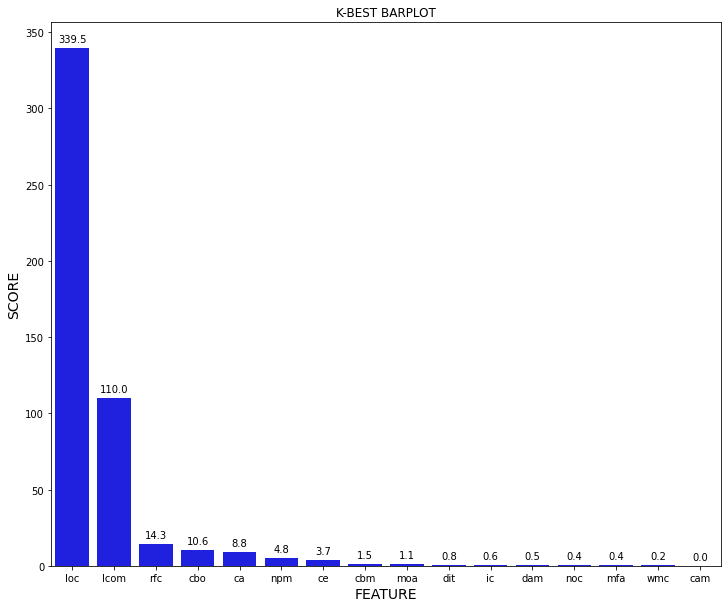

In [12]:
#Preparation of indipendent and dependent variables
X = df_dummy.iloc[:, 0:16]
y = df_dummy.iloc[:, 17]

#I run selectkbest on variables
skb = SelectKBest(chi2, k=3).fit(X, y)
#Creation of the dataset based on selectkbest results
chi2_scores =  pd.DataFrame(list(zip(df_dummy.columns[0:16],skb.scores_,skb.pvalues_)), columns=['feature', 'score', 'pval'])
#print(chi2_scores.columns)
chi2_scores = chi2_scores.sort_values(by="score", ascending=False)
chi2_scores.reset_index()
print("chi2 scores")
print(chi2_scores)
#k_features conversation in a list
k_features =list(chi2_scores.iloc[:3,0])
#graph
plt.figure(figsize=(12, 10))
g = sns.barplot(x=chi2_scores["feature"], y= chi2_scores["score"], color="blue")
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("K-BEST BARPLOT")    
plt.xlabel("FEATURE", size=14)
plt.ylabel("SCORE", size=14)

In [13]:
print("The best features are: " +  " - ".join(k_features))

The best features are: loc - lcom - rfc


In [14]:
#Dataset creation with kbest features
df_kbest = df_dummy.loc[:, k_features]
df_kbest["bug"] = bug
df_kbest.head(5)

,loc,lcom,rfc,bug
0,113,1,16,0
1,82,4,8,0
2,687,0,55,1
3,464,1,36,0
4,213,6,29,0


##GRAPHS

In [15]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.5f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0, 0.5, 'VALUE')

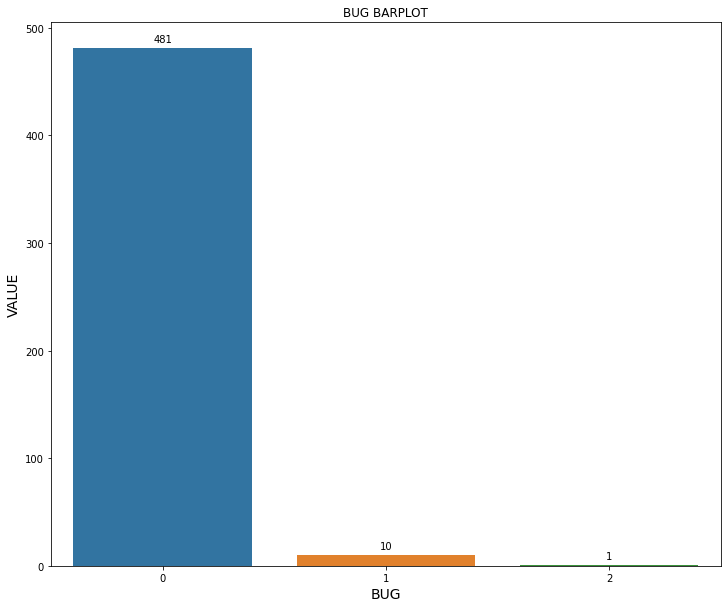

In [16]:
#Counting bug values and list conversation
bugs = bug.value_counts().tolist()
#Extracting unique bug values
n_bug = bug.unique().tolist()
#Bar graph
plt.figure(figsize=(12, 10))
g = sns.barplot(x=n_bug, y= bugs)
for p in g.patches:
    g.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("BUG BARPLOT")
plt.xlabel("BUG", size=14)
plt.ylabel("VALUE", size=14)

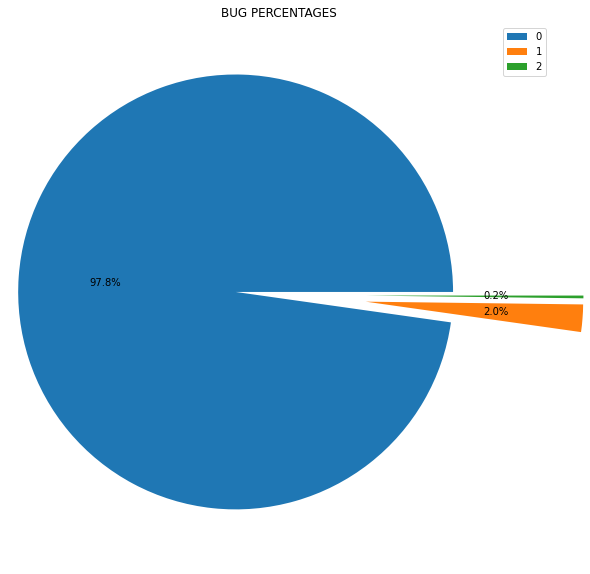

In [17]:
#bug pie chart
fig1, ax1 = plt.subplots(figsize=(10, 10))
myexplode = [0.2, 0.4, 0.4]
ax1.pie(bugs, explode=myexplode, autopct='%1.1f%%', shadow=False)
plt.title("BUG PERCENTAGES")
plt.legend(n_bug)
plt.show()

Text(0.5, 1.0, 'loc PLOT')

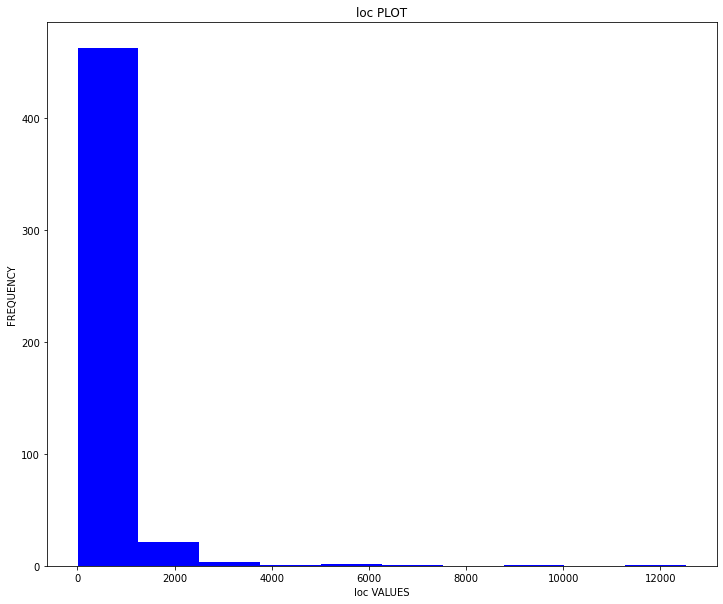

In [18]:
#bug -loc histplot
plt.figure(figsize=(12, 10))
g = df_dummy[k_features[0]].plot(kind="hist", color="blue")
plt.xlabel(k_features[0]+" VALUES")
plt.ylabel("FREQUENCY")
plt.title(k_features[0]+" PLOT")

Text(0.5, 1.0, 'lcom PLOT')

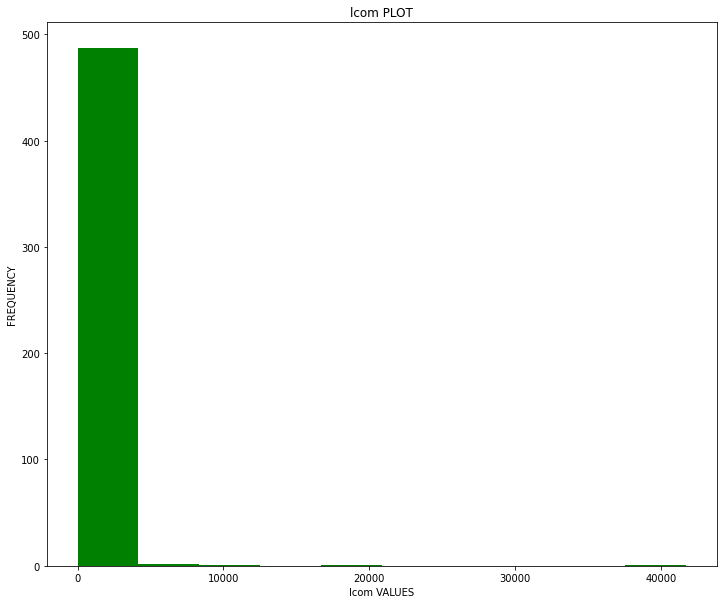

In [19]:
#bug -lcom histplot
plt.figure(figsize=(12, 10))
df_dummy[k_features[1]].plot(kind="hist", color="green")
plt.xlabel(k_features[1]+" VALUES")
plt.ylabel("FREQUENCY")
plt.title(k_features[1] +" PLOT")

Text(0.5, 1.0, 'rfc PLOT')

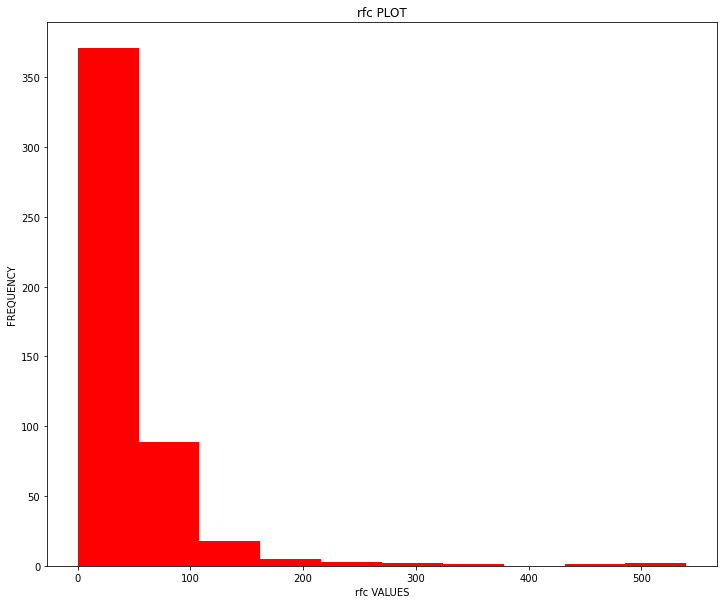

In [20]:
#bug -rfc histplot
plt.figure(figsize=(12, 10))
df_dummy[k_features[2]].plot(kind="hist", color="red")
plt.xlabel(k_features[2]+" VALUES")
plt.ylabel("FREQUENCY")
plt.title(k_features[2] +" PLOT")

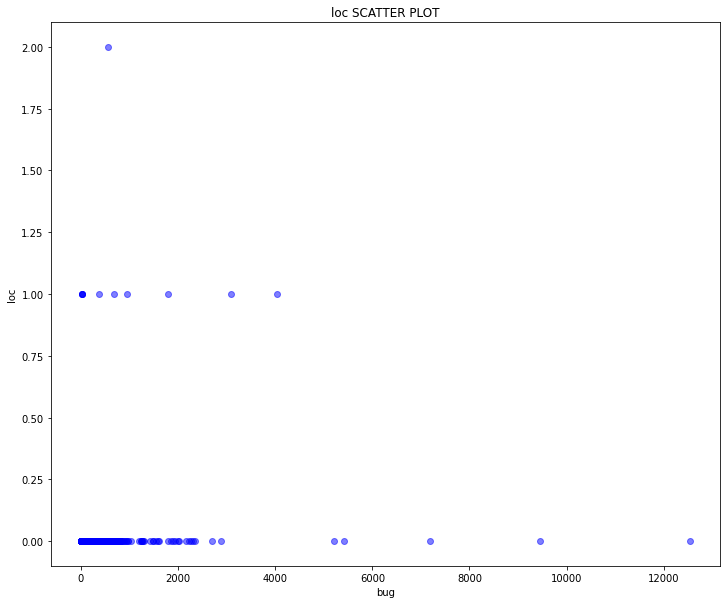

In [21]:
#loc scatter plot
plt.figure(figsize=(12, 10))
y = df_dummy['bug']
#select loc attribute
x = df_dummy[k_features[0]]
plt.scatter(x, y, alpha=0.5, color ="blue")
plt.xlabel("bug")
plt.ylabel(k_features[0])
plt.title(k_features[0] + " SCATTER PLOT")
plt.show()

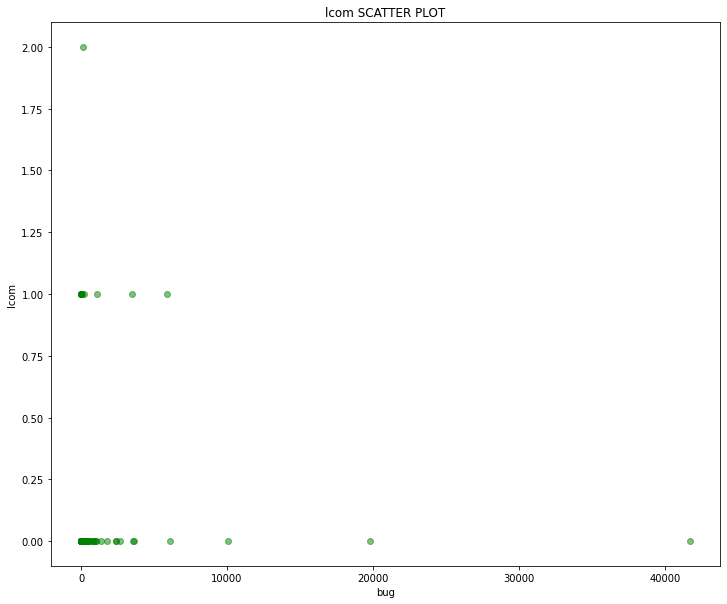

In [22]:
#lcom scatter plot
plt.figure(figsize=(12, 10))
y = df_dummy['bug']
#select lcom attribute
x = df_dummy[k_features[1]]
plt.scatter(x, y, alpha=0.5, color ="green")
plt.xlabel("bug")
plt.ylabel(k_features[1])
plt.title(k_features[1]+ " SCATTER PLOT")
plt.show()

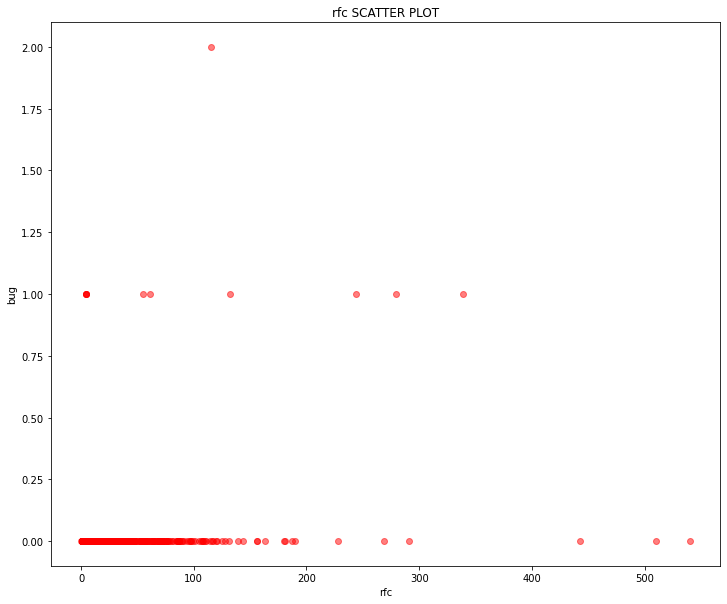

In [23]:
#lcom scatter plot
plt.figure(figsize=(12, 10))
y = df_dummy['bug']
#select rfc attribute
x = df_dummy[k_features[2]]
plt.scatter(x, y, alpha=0.5, color ="red")
plt.xlabel(k_features[2])
plt.ylabel("bug")
plt.title(k_features[2]+ " SCATTER PLOT")
plt.show()

Text(0.5, 1.0, 'loc AREA PLOT')

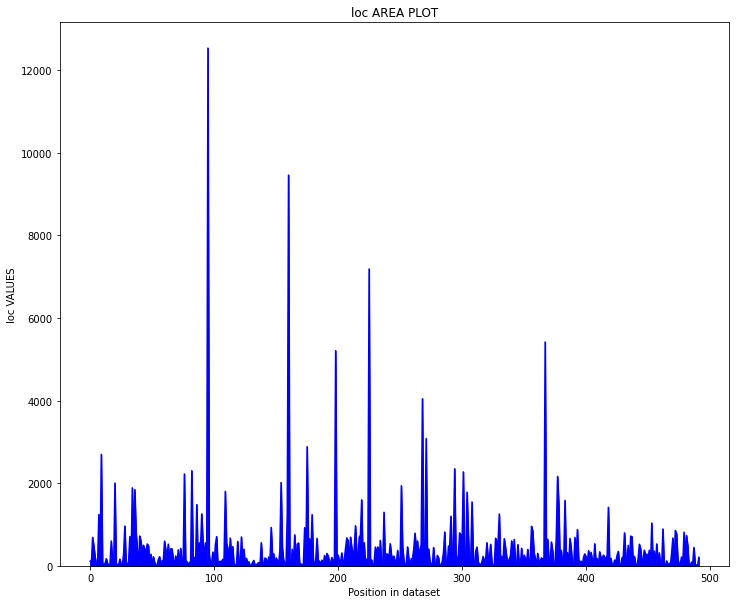

In [24]:
#Area plot
plt.figure(figsize=(12, 10))
#select loc
df_dummy[k_features[0]].plot(kind="area", color="blue")
plt.xlabel("Position in dataset")
plt.ylabel(k_features[0]+" VALUES")
plt.title(k_features[0] +" AREA PLOT")

Text(0.5, 1.0, 'lcom AREA PLOT')

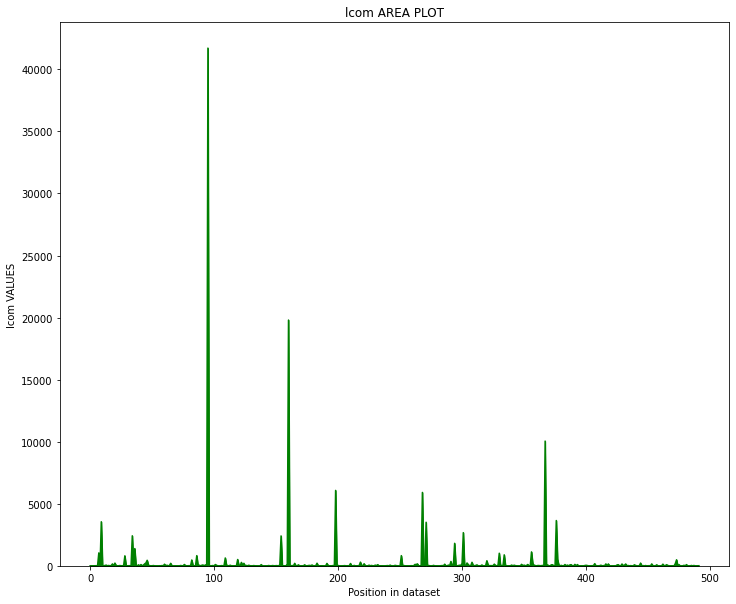

In [25]:
plt.figure(figsize=(12, 10))
#select lcom
df_dummy[k_features[1]].plot(kind="area", color="green")
plt.xlabel("Position in dataset")
plt.ylabel(k_features[1]+" VALUES")
plt.title(k_features[1] +" AREA PLOT")

Text(0.5, 1.0, 'rfc AREA PLOT')

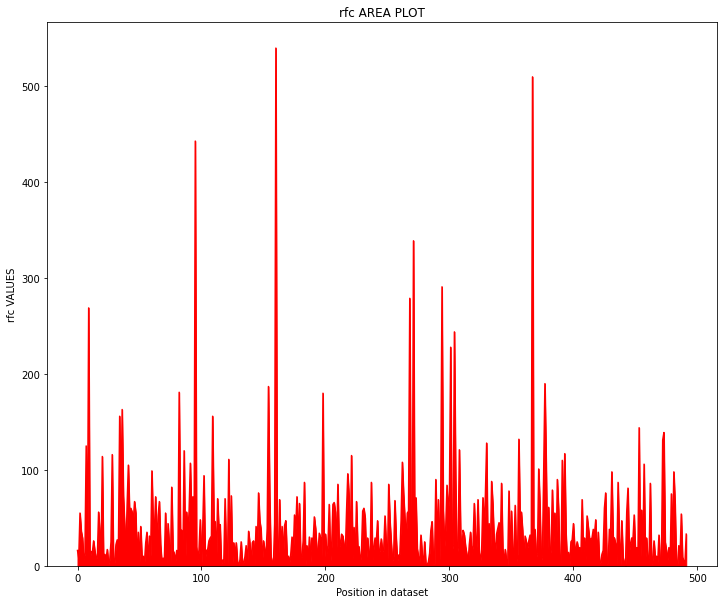

In [26]:
plt.figure(figsize=(12, 10))
#select rfc
df_dummy[k_features[2]].plot(kind="area", color="red")
plt.xlabel("Position in dataset")
plt.ylabel(k_features[2]+" VALUES")
plt.title(k_features[2] +" AREA PLOT")

In [27]:
#Boxplot
x="bug"
tit="Distribution of " + x  
fig = go.Figure()
fig.add_trace(go.Box(y=df_dummy[x], name=""))
fig.update_layout(title=tit ,yaxis_title=x,xaxis_title="Distribution of " + x)
fig.show()

In [28]:
x=k_features[0]
tit="Distribution of " + x  
fig = go.Figure()
fig.add_trace(go.Box(y=df_dummy[x], name=""))
fig.update_layout(title=tit ,yaxis_title=x,xaxis_title="Distribution of " + x)
fig.show()

In [29]:
x=k_features[1]
tit="Distribution of " + x  
fig = go.Figure()
fig.add_trace(go.Box(y=df_dummy[x], name=""))
fig.update_layout(title=tit ,yaxis_title=x,xaxis_title="Distribution of " + x)
fig.show()

In [30]:
x=k_features[2]
tit="Distribution of " + x  
fig = go.Figure()
fig.add_trace(go.Box(y=df_dummy[x], name=""))
fig.update_layout(title=tit ,yaxis_title=x,xaxis_title="Distribution of " + x)
fig.show()

##DESCRIPTIVE STATISTIC

In [31]:
df_jedit = df_jedit.drop("version", axis=1)
df_jedit.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,loc,dam,moa,mfa,cam,ic,cbm,max_cc,avg_cc,bug
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,12.351626,2.367886,0.447154,14.317073,39.849593,259.906504,8.739837,7.097561,7.851626,411.306911,0.496919,1.079268,0.415344,0.462153,0.595528,1.497967,6.587398,9.250704,0.024390
std,24.512359,1.931839,2.432647,25.004054,56.341461,2184.685294,21.846190,9.112257,15.292942,946.964597,0.464965,2.057181,0.440211,0.254189,1.001537,3.234551,11.127226,17.242920,0.167084
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,4.000000,9.000000,1.000000,1.000000,2.000000,2.000000,41.750000,0.000000,0.000000,0.000000,0.259815,0.000000,0.000000,1.000000,0.851150,0.000000
50%,7.000000,1.500000,0.000000,8.500000,24.500000,6.000000,3.000000,5.000000,4.000000,176.000000,0.500000,0.000000,0.052632,0.425735,0.000000,0.000000,3.000000,1.700000,0.000000
75%,13.000000,3.000000,0.000000,15.000000,52.250000,36.000000,7.000000,9.000000,8.000000,447.000000,1.000000,1.000000,0.933333,0.625000,1.000000,1.000000,8.000000,14.523250,0.000000
max,351.000000,8.000000,38.000000,346.000000,540.000000,41713.000000,291.000000,101.000000,218.000000,12535.000000,1.000000,13.000000,1.000000,1.000000,5.000000,20.000000,167.000000,251.429000,2.000000


In [32]:
for i in k_features:
    print("The maximum value of "+ i +" is: "+ str(df_kbest[i].max()) )
    print("The minimum value of "+ i +" is: "+ str(df_kbest[i].min()) )
    print("The avarage of "+ i +" is: "+ str("%.2f" %(df_kbest[i].mean())))
    print("First quartile value of "+ i +" is: "+  str(np.quantile(df_kbest[i], .25)))
    print("Second quartile value of "+ i +" is: "+  str(np.quantile(df_kbest[i], .50)))    
    print("Third quartile value of "+ i +" is: "+  str(np.quantile(df_kbest[i], .75)))

    print()

The maximum value of loc is: 12535
The minimum value of loc is: 1
The avarage of loc is: 411.31
First quartile value of loc is: 41.75
Second quartile value of loc is: 176.0
Third quartile value of loc is: 447.0

The maximum value of lcom is: 41713
The minimum value of lcom is: 0
The avarage of lcom is: 259.91
First quartile value of lcom is: 1.0
Second quartile value of lcom is: 6.0
Third quartile value of lcom is: 36.0

The maximum value of rfc is: 540
The minimum value of rfc is: 0
The avarage of rfc is: 39.85
First quartile value of rfc is: 9.0
Second quartile value of rfc is: 24.5
Third quartile value of rfc is: 52.25



In [33]:
#small statement for assigning classes
df_kbest["class"]=0
countClass0 = countClass1 = 0
for x in range(df_jedit.shape[0]):
    if df_kbest["bug"].iloc[x] == 0:
        df_kbest["class"].iloc[x] = 0
        countClass0 = countClass0 + 1
    else:
        df_kbest["class"].iloc[x] =  1
        countClass1 = countClass1 + 1

#print a description of datafarme        
df_kbest.describe()

,loc,lcom,rfc,bug,class
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,411.306911,259.906504,39.849593,0.024390,0.022358
std,946.964597,2184.685294,56.341461,0.167084,0.147995
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,9.000000,0.000000,0.000000
50%,176.000000,6.000000,24.500000,0.000000,0.000000
75%,447.000000,36.000000,52.250000,0.000000,0.000000
max,12535.000000,41713.000000,540.000000,2.000000,1.000000


##DATA ANALYSIS TECNIQUES

###LINEAR REGRESSION

In [34]:
#linear regression method
def linear_regression(df,feature):
  X = df[[feature]]   
  y = df['bug']  
  lm = LinearRegression()   
  reg = lm.fit(X,y)
  prediction = lm.predict(X)
  reg_score = reg.score(X, y)
  #print("Regression score: "+ str(reg_score))
  reg_coef = (reg.coef_)
  print("Regression coef: "+ str(reg_coef)[1:8])
  reg_int = reg.intercept_
  print("Regression intercept: "+ str(reg_int)[:6])
  print('R squared error', r2_score(y, prediction))  
  print("")
  print("y = "+str(reg_coef)[1:8]+"x + "+ str(reg_int)[:6])
  plt.scatter(X, y, color = 'blue')     
  plt.plot(X, prediction, color = 'red')    
  plt.title('LINEAR REGRESSION bug - '+feature)     
  plt.xlabel(feature)    
  plt.ylabel('bug')     
  plt.show()

In [35]:
#linear regression plot method
def plot_reg(X,y,y_p):     
  plt.scatter(X, y, color = 'blue')     
  plt.plot(X, y_p, color = 'red')    
  plt.title('Linear regression')     
  plt.xlabel('independent')     
  plt.ylabel('bug')     
  plt.show()

Regression coef: 1.62691
Regression intercept: 0.0176
R squared error 0.008502113787030252

y = 1.62691x + 0.0176


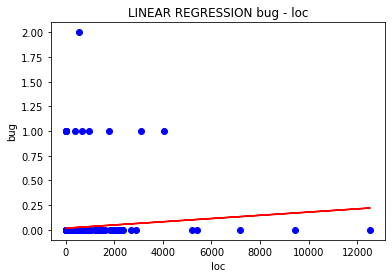

In [36]:
#call linear regression with feature loc
linear_regression(df_kbest, "loc")

Regression coef: 3.42616
Regression intercept: 0.0234
R squared error 0.002006893781149377

y = 3.42616x + 0.0234


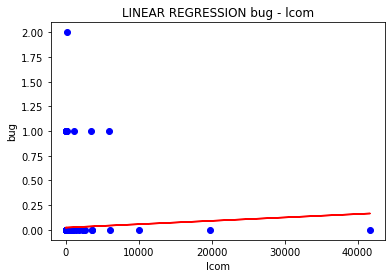

In [37]:
#call linear regression with feature lcom
linear_regression(df_kbest, "lcom")

Regression coef: 0.00056
Regression intercept: 0.0019
R squared error 0.03606665123963204

y = 0.00056x + 0.0019


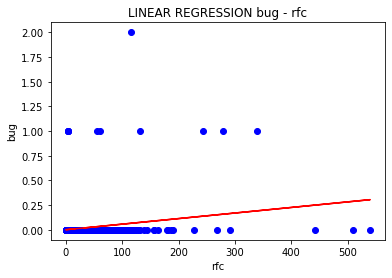

In [38]:
#call linear regression with feature rfc
linear_regression(df_kbest, "rfc")

###OUTLIERS MANAGEMENT

In [39]:
#create indipendent list with every attribute
list_loc = df_kbest["loc"]
list_rfc = df_kbest["rfc"]
list_lcom = df_kbest["lcom"]

In [40]:
#create dataframe from lists
df_loc = pd.DataFrame(list(zip(list_loc, bug)),columns=["loc","bug"])
df_lcom = pd.DataFrame(list(zip(list_lcom, bug)),columns=["lcom","bug"])
df_rfc = pd.DataFrame(list(zip(list_rfc, bug)),columns=["rfc","bug"])

In [41]:
def outliers_remove(df):
  #define quantiles
  Q1 = df.iloc[:, 0].quantile(q=.02)
  Q3 = df.iloc[:, 0].quantile(q=.98)
  IQR =  df.iloc[:,0].apply(stats.iqr)
  data_clean = df[(df.iloc[:,0] > (Q1 - 3 * IQR)) & (df.iloc[:,0] < (Q3 + 3 * IQR))]
  data_clean = data_clean.dropna()
  data_clean = data_clean.reset_index(drop=True)
  #print first five rows of the new dataset
  print(data_clean.head())
  #print the ney shape
  print("The new shape is: "+ str(data_clean.shape))
  return data_clean

In [42]:
#call outliers_remove with feature loc
df_loc_clean = outliers_remove(df_loc)

   loc  bug
0  113    0
1   82    0
2  687    1
3  464    0
4  213    0
The new shape is: (467, 2)


In [43]:
#call outliers_remove with feature lcom
df_lcom_clean = outliers_remove(df_lcom)

   lcom  bug
0     1    0
1     4    0
2     1    0
3     6    0
4    10    0
The new shape is: (377, 2)


In [44]:
#call outliers_remove with feature rfc
df_rfc_clean = outliers_remove(df_rfc)

   rfc  bug
0   16    0
1    8    0
2   55    1
3   36    0
4   29    0
The new shape is: (464, 2)


In [45]:
#function that compare the distribution of original dataset and cleared dataset
def comparision_box(df_clean, df_original):
  fig = go.Figure()
  fig.add_trace(go.Box(x=df_clean.iloc[:,0], name ="cleared"))
  fig.add_trace(go.Box(x=df_original.iloc[:, 0], name ="original"))
  fig.show()

In [46]:
comparision_box(df_loc_clean, df_loc)

In [47]:
comparision_box(df_lcom_clean, df_lcom)

In [48]:
comparision_box(df_rfc_clean, df_rfc)

Regression coef: 2.41420
Regression intercept: 0.0137
R squared error 0.0037179388268826496

y = 2.41420x + 0.0137


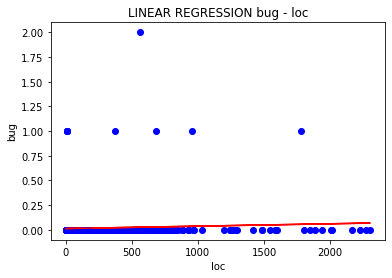

In [49]:
#linear regression with cleared loc dataset
linear_regression(df_loc_clean, "loc")

Regression coef: 5.68183
Regression intercept: 0.0195
R squared error 0.005505814421703614

y = 5.68183x + 0.0195


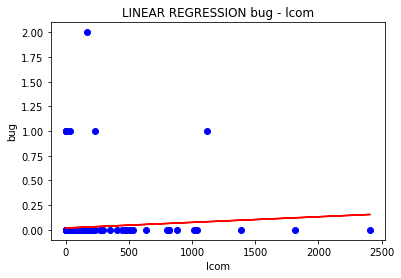

In [50]:
  #linear regression with cleared lcom dataset
  linear_regression(df_lcom_clean, "lcom")

Regression coef: 0.00034
Regression intercept: 0.0074
R squared error 0.005618254324777916

y = 0.00034x + 0.0074


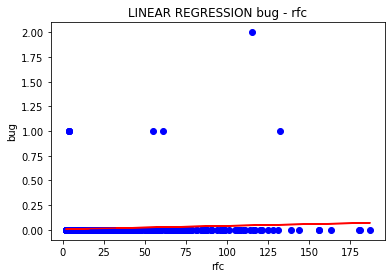

In [51]:
  #linear regression with cleared rfc dataset
  linear_regression(df_rfc_clean, "rfc")

###LINEAR REGRESSION COMPARISON

In [52]:
#function that overlap the linear regression with original and cleared dataset
def multiple_linear_regression(df, df_clean, feature):
  X1 = df[[feature]]   
  y1 = df['bug'] 
  X2 = df_clean[[feature]] 
  y2 = df_clean['bug'] 
  lm = LinearRegression()   
  lm2 = LinearRegression()   
  lm.fit(X1,y1)
  lm2.fit(X2,y2)
  prediction = lm.predict(X1)
  prediction2 = lm2.predict(X2)
  plt.scatter(X1, y1, color = 'blue')     
  plt.plot(X1, prediction, color = 'magenta')  
  plt.scatter(X2, y2, color = 'green')     
  plt.plot(X2, prediction2, color = 'red')   
  plt.title('LINEAR REGRESSION bug - '+feature)     
  plt.xlabel(feature)    
  plt.ylabel('bug')     
  plt.show()

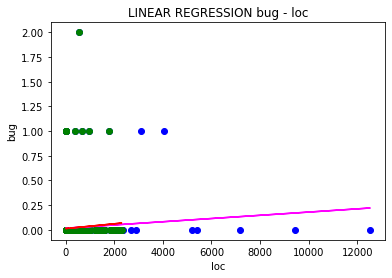

In [53]:
multiple_linear_regression(df_kbest, df_loc_clean,"loc")

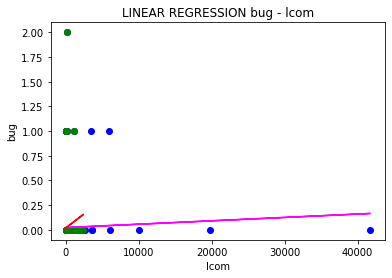

In [54]:
multiple_linear_regression(df_kbest, df_lcom_clean,"lcom")

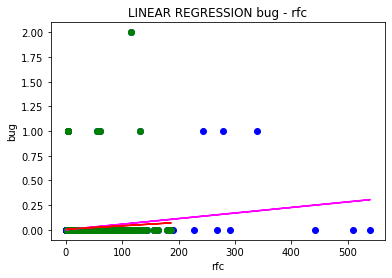

In [55]:
multiple_linear_regression(df_kbest, df_rfc_clean,"rfc")

###KNN 

In [56]:
#define k value
max_k=51

In [57]:
def knnPreSplit(df, ts):
    #preprocessing
    X=df.iloc[:, 0:2].values#data
    y=df.iloc[:, 2].values#target
    #suddivision
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=ts)
    #feature scaling
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    return X_train,X_test,y_train,y_test

In [58]:
#return classifier and predicted targets
def knnPred(k,X_train,y_train,X_test):
    #training and prediction
    classifier=KNeighborsClassifier(k)
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    return classifier,y_pred

In [59]:
#print accuracy evaluation
def knnEval(y_test,y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

In [60]:
#return array with accuracy for k from 1 to 51 
def varKtrain(X_train,y_train,X_test,y_test):#su train
    #evaluation varying k
    accuracy=[]
    #accuracy calculation for k varying from 1 to 51
    for i in range(1,max_k):
        k=i
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i=knn.predict(X_train)
        report = classification_report(y_train, pred_i, output_dict=True)
        accuracy.append(report['accuracy'])
    return accuracy

In [61]:
def plotVarK(error,name):
    #varying k plot
    plt.figure(figsize=(12,6))
    plt.plot(range(1,max_k),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',
        markersize=10)
    plt.title('Accuracy Rate K Value '+name)
    plt.xlabel('Kvalue')
    plt.ylabel('Accuracy(%)')

In [62]:
#return the values of a good k and a bad k
def knnLowHigh(accuracy):
    listak=[]
    for i in range(1,max_k):
        listak.append(i)
    #convert array into df   
    accuracyDf= pd.DataFrame(accuracy, columns=['accuracy'])
    accuracyDf['kappa']=listak
    accuracyDf.set_index('kappa', inplace=True)
    #sort df
    accuracyDf.sort_values(by=['accuracy'], inplace = True)

    testa = accuracyDf.head(1)
    for row in testa.index:
        low=row

    coda= accuracyDf.tail(1)
    for row in coda.index:
        high=row
    
    print("A K with low accuracy: ")
    print(low)
    print("A K with high accuracy: ")
    print(high)
    return low,high

In [63]:
def plotKNN(Xtr,Xte,ytr,yte,k,legend,case):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    padding = 0.1
    resolution = 0.1

    colors = {0: 'green', 1: 'yellow', 2: 'black'}
    x_min, x_max = Xtr[:, 0].min(), Xtr[:, 0].max()
    y_min, y_max = Xtr[:, 1].min(), Xtr[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Get decision boundaries from model
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('tab20'))
    plt.axis('tight')
    
    #switch to auto set the name of the graph
    switch={
        "general": 'General K-nearest neighbors case with k= {}'.format(k),
        "low": 'Worst K-nearest neighbors case with k= {}'.format(k),
        "high": 'Best K-nearest neighbors case with k= {}'.format(k)
    } 
    
    i=0
    # Plot your testing points as well
    for label in np.unique(yte):
        indices = np.where(yte == label)
        plt.scatter(Xte[indices, 0], Xte[indices, 1],c=colors[label], alpha=0.8,label=legend[i])
        i=i+1
    
    plt.legend(loc='lower right')
    plt.title(switch.get(case))
    
    plt.show()

In [64]:
#create another feature called class. Class contains the value of bug (identical to bug)
df_loc["class"] = df_loc["bug"]
df_loc["class"].value_counts()

0    481
1     10
2      1
Name: class, dtype: int64

In [65]:
X=df_loc.iloc[:, 0:2].values#data
y=df_loc.iloc[:, 2].values#target
#suddivision
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30)
#feature scaling
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
accuracyTrain=varKtrain(X_train,y_train,X_test,y_test)#Train variation

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

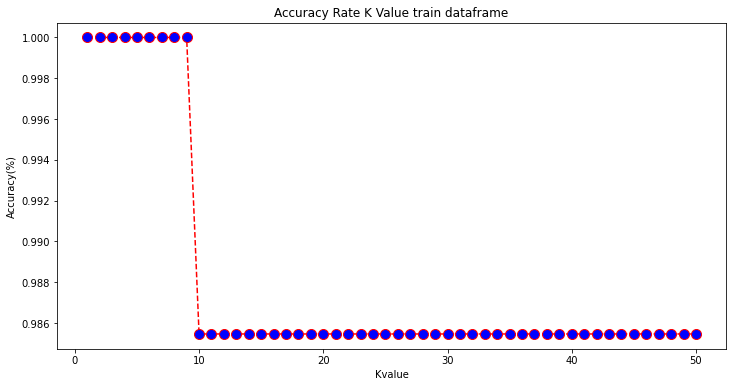

In [67]:
plotVarK(accuracyTrain,"train dataframe")#plot train variation

In [68]:
low,high=knnLowHigh(accuracyTrain)#get a good k and a bad k

A K with low accuracy: 
25
A K with high accuracy: 
1


[[142   0   0]
 [  5   0   0]
 [  1   0   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       142
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1

    accuracy                           0.96       148
   macro avg       0.32      0.33      0.33       148
weighted avg       0.92      0.96      0.94       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



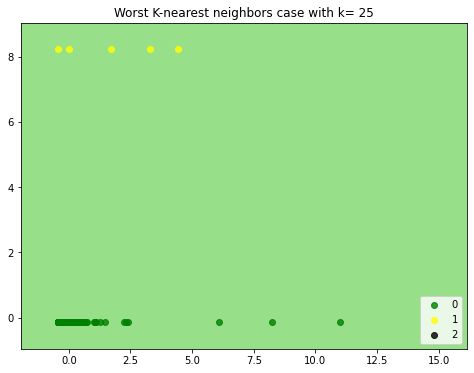

In [69]:
#low accuracy k case
k=low
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
acc_k_low = accuracy_score(y_test, y_pred)
plotKNN(X_train,X_test,y_train,y_test,k,df_loc['class'].unique(),"low")

[[142   0   0]
 [  0   5   0]
 [  0   1   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         1

    accuracy                           0.99       148
   macro avg       0.61      0.67      0.64       148
weighted avg       0.99      0.99      0.99       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



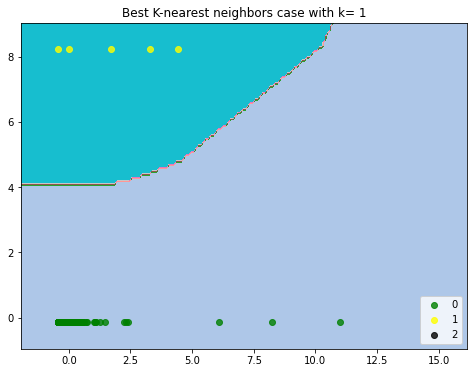

In [70]:
#high accuracy k case
k=high
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
acc_k_high = accuracy_score(y_test, y_pred)
plotKNN(X_train,X_test,y_train,y_test,k,df_loc['class'].unique(),"high")

[[142   0   0]
 [  0   5   0]
 [  0   1   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         1

    accuracy                           0.99       148
   macro avg       0.61      0.67      0.64       148
weighted avg       0.99      0.99      0.99       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



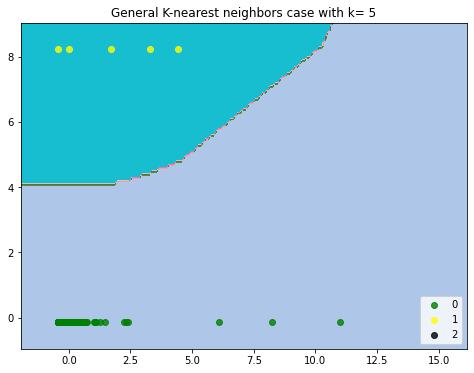

In [71]:
#general case
general=5
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
acc_k_general = accuracy_score(y_test, y_pred)
plotKNN(X_train,X_test,y_train,y_test,general,df_loc['class'].unique(),"general")

##COMPARE CASE RESULTS

In [72]:
#create a row for a dataframe
data = {'k_value': ["low ("+str(low)+")", "general ("+str(general)+")","high ("+str(high)+")",], 'accuracy': [acc_k_low, acc_k_general, acc_k_high]}
#add it into dataframe
df_accuracy = pd.DataFrame(data=data, dtype=float)
#print df
df_accuracy

,k_value,accuracy
0,low (25),0.959459
1,general (5),0.993243
2,high (1),0.993243


Text(0, 0.5, 'ACCURACY')

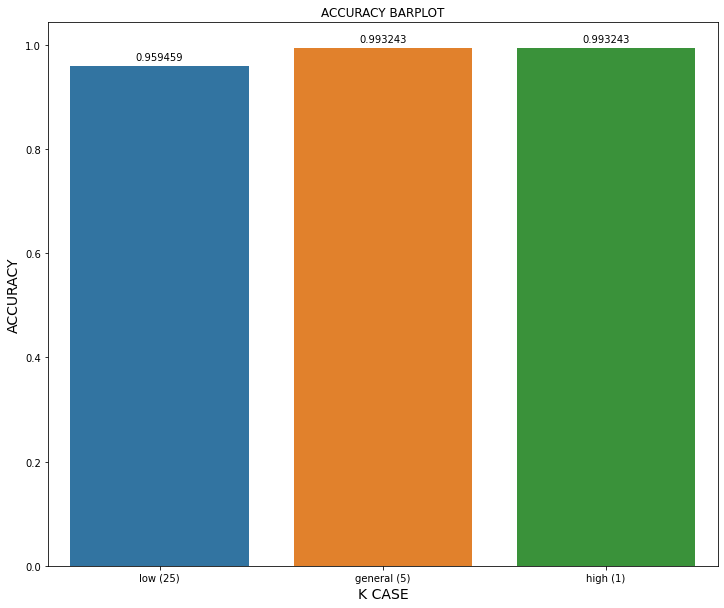

In [73]:
#vertical barplot for accuracy results
plt.figure(figsize=(12, 10))
g = sns.barplot(x=df_accuracy["k_value"], y= df_accuracy["accuracy"])
for p in g.patches:
    g.annotate(format(round(p.get_height(),6)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("ACCURACY BARPLOT")
plt.xlabel("K CASE", size=14)
plt.ylabel("ACCURACY", size=14)

##PEARSON, SPEARMAN AND KENDALL CORRELATIONS

In [79]:
#create an ad hoc dataframe for these statistics
df_stats = pd.DataFrame(columns=["Feature","Pearson","Spearman","Kendall"])

In [80]:
df_kbest_feat = df_kbest[["loc","lcom","rfc"]]
#calculate Pearson, Spearman and Kendall correlations
for i in (df_kbest_feat.columns):
  p_app = stats.pearsonr(bug, df_kbest[i])[0]
  s_app = stats.spearmanr(bug, df_kbest[i])[0]
  k_app = stats.kendalltau(bug, df_kbest[i])[0]
  row = pd.DataFrame([[i, p_app, s_app, k_app]], columns=["Feature","Pearson","Spearman","Kendall"])
  df_stats =df_stats.append(row)

In [81]:
# print the dataframe
df_stats

,Feature,Pearson,Spearman,Kendall
0,loc,0.092207,0.062697,0.051132
0,lcom,0.044798,0.062384,0.052489
0,rfc,0.189912,0.070574,0.057876


In [82]:
#crate another dataframe for cleared statistics
df_stats_clear = pd.DataFrame(columns=["Feature","Pearson","Spearman","Kendall"])

#calculate Pearson, Spearman and Kendall correlations with loc values
loc_clear_stat_p = stats.pearsonr(df_loc_clean["bug"], df_loc_clean["loc"])[0]
loc_clear_stat_s = stats.spearmanr(df_loc_clean["bug"], df_loc_clean["loc"])[0]
loc_clear_stat_t = stats.kendalltau(df_loc_clean["bug"], df_loc_clean["loc"])[0]
#add results into the dataframe
row_loc = pd.DataFrame([["loc",loc_clear_stat_p, loc_clear_stat_s, loc_clear_stat_t]], columns=["Feature","Pearson","Spearman","Kendall"])
df_stats_clear =df_stats_clear.append(row_loc)

#calculate Pearson, Spearman and Kendall correlations with lcom values
lcom_clear_stat_p = stats.pearsonr(df_lcom_clean["bug"], df_lcom_clean["lcom"])[0]
lcom_clear_stat_s = stats.spearmanr(df_lcom_clean["bug"], df_lcom_clean["lcom"])[0]
lcom_clear_stat_t = stats.kendalltau(df_lcom_clean["bug"], df_lcom_clean["lcom"])[0]
#add results into the dataframe
row_lcom = pd.DataFrame([["lcom",lcom_clear_stat_p, lcom_clear_stat_s, lcom_clear_stat_t]], columns=["Feature","Pearson","Spearman","Kendall"])
df_stats_clear =df_stats_clear.append(row_lcom)

#calculate Pearson, Spearman and Kendall correlations with rfc values
rfc_clear_stat_p = stats.pearsonr(df_rfc_clean["bug"], df_rfc_clean["rfc"])[0]
rfc_clear_stat_s = stats.spearmanr(df_rfc_clean["bug"], df_rfc_clean["rfc"])[0]
rfc_clear_stat_t = stats.kendalltau(df_rfc_clean["bug"], df_rfc_clean["rfc"])[0]
#add results into the dataframe
row_rfc = pd.DataFrame([["rfc",rfc_clear_stat_p, rfc_clear_stat_s, rfc_clear_stat_t]], columns=["Feature","Pearson","Spearman","Kendall"])
df_stats_clear =df_stats_clear.append(row_rfc)

In [83]:
#print the dataframe
df_stats_clear

,Feature,Pearson,Spearman,Kendall
0,loc,0.060975,0.016831,0.013612
0,lcom,0.074201,-0.004444,-0.003976
0,rfc,0.074955,-0.002995,-0.002595
